In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(a):
    """Derivative when input is the ACTIVATION, not the raw z."""
    return a * (1 - a)

In [3]:
# ---------------------------------------------------------------------
# Input Data (AND Gate)
# ---------------------------------------------------------------------
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [0], [0], [1]])

In [4]:
# ---------------------------------------------------------------------
# Initialization
# ---------------------------------------------------------------------
np.random.seed(42)
learning_rate = 0.1

input_neurons = 2
hidden_neurons = 2
output_neurons = 1

In [5]:
# Better initialization for stability
W1 = np.random.randn(input_neurons, hidden_neurons)
b1 = np.random.randn(1, hidden_neurons)

W2 = np.random.randn(hidden_neurons, output_neurons)
b2 = np.random.randn(1, output_neurons)

In [6]:
# Training Steps

epochs = 1000
loss_history = []

In [7]:
for i in range(epochs):

    # -------- Feedforward --------
    hidden_layer_input = np.dot(X, W1) + b1
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, W2) + b2
    predicted_output = sigmoid(output_layer_input)

    # -------- Backpropagation --------
    # Output layer error
    error_output = predicted_output - y
    d_predicted_output = error_output * sigmoid_derivative(predicted_output)

    # Hidden layer error
    error_hidden = d_predicted_output.dot(W2.T)
    d_hidden_layer = error_hidden * sigmoid_derivative(hidden_layer_output)

    # -------- Update weights (Gradient Descent) --------
    W2 -= hidden_layer_output.T.dot(d_predicted_output) * learning_rate
    b2 -= np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate

    W1 -= X.T.dot(d_hidden_layer) * learning_rate
    b1 -= np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

    # -------- Loss Logging --------
    loss = np.mean((y - predicted_output) ** 2)
    loss_history.append(loss)

    if i % 10 == 0:
        print(f"Epoch {i} | Loss: {loss:.4f}")

Epoch 0 | Loss: 0.3682
Epoch 10 | Loss: 0.2551
Epoch 20 | Loss: 0.2035
Epoch 30 | Loss: 0.1841
Epoch 40 | Loss: 0.1761
Epoch 50 | Loss: 0.1721
Epoch 60 | Loss: 0.1698
Epoch 70 | Loss: 0.1681
Epoch 80 | Loss: 0.1667
Epoch 90 | Loss: 0.1654
Epoch 100 | Loss: 0.1642
Epoch 110 | Loss: 0.1630
Epoch 120 | Loss: 0.1618
Epoch 130 | Loss: 0.1606
Epoch 140 | Loss: 0.1594
Epoch 150 | Loss: 0.1582
Epoch 160 | Loss: 0.1570
Epoch 170 | Loss: 0.1557
Epoch 180 | Loss: 0.1545
Epoch 190 | Loss: 0.1532
Epoch 200 | Loss: 0.1519
Epoch 210 | Loss: 0.1506
Epoch 220 | Loss: 0.1493
Epoch 230 | Loss: 0.1479
Epoch 240 | Loss: 0.1466
Epoch 250 | Loss: 0.1452
Epoch 260 | Loss: 0.1438
Epoch 270 | Loss: 0.1424
Epoch 280 | Loss: 0.1410
Epoch 290 | Loss: 0.1396
Epoch 300 | Loss: 0.1381
Epoch 310 | Loss: 0.1367
Epoch 320 | Loss: 0.1352
Epoch 330 | Loss: 0.1337
Epoch 340 | Loss: 0.1322
Epoch 350 | Loss: 0.1307
Epoch 360 | Loss: 0.1292
Epoch 370 | Loss: 0.1277
Epoch 380 | Loss: 0.1261
Epoch 390 | Loss: 0.1246
Epoch 400 |

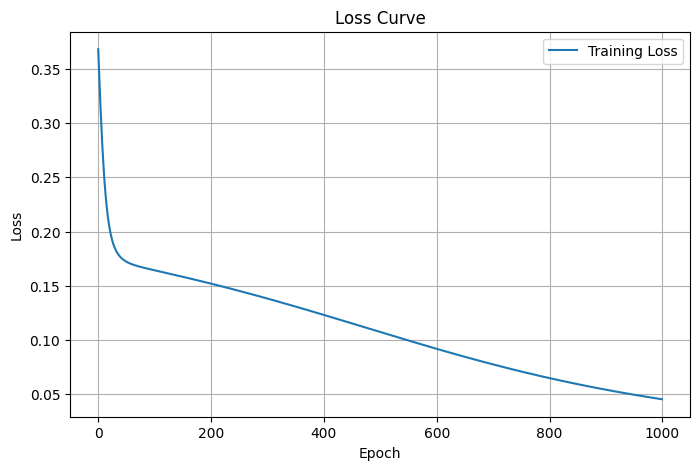

In [8]:
# ---------------------------------------------------------------------
# Plot Loss After Training
# ---------------------------------------------------------------------
plt.figure(figsize=(8, 5))
plt.plot(loss_history, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# ---------------------------------------------------------------------
# Final Output
# ---------------------------------------------------------------------
print("\nFinal Predicted Output:")
print(predicted_output)

print("\nRounded Output:")
print(np.round(predicted_output))


Final Predicted Output:
[[0.05729974]
 [0.22886392]
 [0.1969836 ]
 [0.70594697]]

Rounded Output:
[[0.]
 [0.]
 [0.]
 [1.]]



=== Initial Parameters ===
weights_input_hidden:
 [[ 0.49671415 -0.1382643 ]
 [ 0.64768854  1.52302986]]
bias_hidden:
 [[-0.23415337 -0.23413696]]
weights_hidden_output:
 [[1.57921282]
 [0.76743473]]
bias_output:
 [[-0.46947439]]

=== First Forward Pass (Debug Info) ===
z_hidden:
 [[-0.23415337 -0.23413696]
 [ 0.41353516  1.2888929 ]
 [ 0.26256078 -0.37240126]
 [ 0.91024932  1.1506286 ]]
activation_hidden:
 [[0.44172766 0.44173171]
 [0.60193524 0.78395974]
 [0.56526568 0.40796092]
 [0.71305118 0.75962571]]
z_output:
 [[0.56710785]
 [1.08274739]
 [0.7362838 ]
 [1.23954833]]
predictions:
 [[0.63809556]
 [0.74701355]
 [0.67618269]
 [0.77548538]]
Epoch 000 | Loss: 0.368206
Epoch 020 | Loss: 0.203453
Epoch 040 | Loss: 0.176063
Epoch 060 | Loss: 0.169751
Epoch 080 | Loss: 0.166668
Epoch 100 | Loss: 0.164200
Epoch 120 | Loss: 0.161828
Epoch 140 | Loss: 0.159431
Epoch 160 | Loss: 0.156979
Epoch 180 | Loss: 0.154467
Epoch 200 | Loss: 0.151893
Epoch 220 | Loss: 0.149258
Epoch 240 | Loss: 0.1465

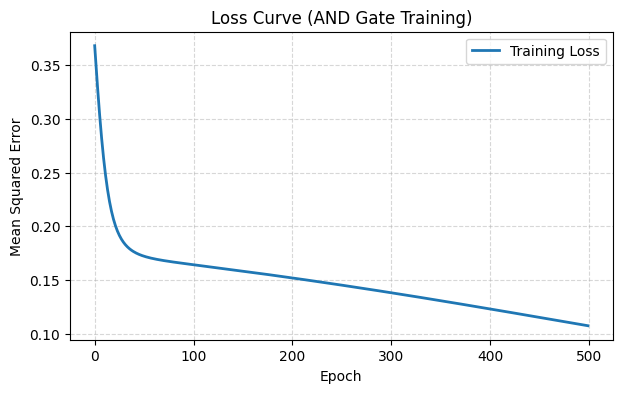


=== Final Network Output ===
[[0.14497737]
 [0.32462637]
 [0.26589592]
 [0.5178079 ]]

=== Rounded Output (AND Gate Prediction) ===
[[0.]
 [0.]
 [0.]
 [1.]]

=== Expected Output ===
[[0]
 [0]
 [0]
 [1]]


In [10]:
import numpy as np
import matplotlib.pyplot as plt


# ------------------------------------------------------------------
# Activation Functions
# ------------------------------------------------------------------
def sigmoid(x: np.ndarray) -> np.ndarray:
    """Compute the sigmoid activation."""
    return 1.0 / (1.0 + np.exp(-x))


def sigmoid_prime(a: np.ndarray) -> np.ndarray:
    """Derivative of the sigmoid; expects output 'a = sigmoid(x)'."""
    return a * (1.0 - a)


# ------------------------------------------------------------------
# Dataset: AND Logic Gate
# ------------------------------------------------------------------
inputs = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

targets = np.array([[0], [0], [0], [1]])


# ------------------------------------------------------------------
# Model Parameters
# ------------------------------------------------------------------
np.random.seed(42)

# Hidden layer weights/biases
weights_input_hidden = np.random.randn(2, 2)
bias_hidden = np.random.randn(1, 2)

# Output layer weights/biases
weights_hidden_output = np.random.randn(2, 1)
bias_output = np.random.randn(1, 1)

learning_rate = 0.1
num_epochs = 500

loss_log = []

print("\n=== Initial Parameters ===")
print("weights_input_hidden:\n", weights_input_hidden)
print("bias_hidden:\n", bias_hidden)
print("weights_hidden_output:\n", weights_hidden_output)
print("bias_output:\n", bias_output)


# ------------------------------------------------------------------
# Training Loop
# ------------------------------------------------------------------
for epoch in range(num_epochs):

    # ------------------------------
    # Forward Pass
    # ------------------------------
    z_hidden = np.dot(inputs, weights_input_hidden) + bias_hidden
    activation_hidden = sigmoid(z_hidden)

    z_output = np.dot(activation_hidden, weights_hidden_output) + bias_output
    predictions = sigmoid(z_output)

    # Show internal values for the first iteration
    if epoch == 0:
        print("\n=== First Forward Pass (Debug Info) ===")
        print("z_hidden:\n", z_hidden)
        print("activation_hidden:\n", activation_hidden)
        print("z_output:\n", z_output)
        print("predictions:\n", predictions)

    # ------------------------------
    # Backpropagation
    # ------------------------------
    # Output layer gradient
    error_output = predictions - targets
    delta_output = error_output * sigmoid_prime(predictions)

    # Hidden layer gradient
    error_hidden = delta_output.dot(weights_hidden_output.T)
    delta_hidden = error_hidden * sigmoid_prime(activation_hidden)

    # Gradients for weight/bias updates
    grad_weights_hidden_output = activation_hidden.T.dot(delta_output)
    grad_bias_output = np.sum(delta_output, axis=0, keepdims=True)

    grad_weights_input_hidden = inputs.T.dot(delta_hidden)
    grad_bias_hidden = np.sum(delta_hidden, axis=0, keepdims=True)

    # ------------------------------
    # Parameter Update
    # ------------------------------
    weights_hidden_output -= learning_rate * grad_weights_hidden_output
    bias_output -= learning_rate * grad_bias_output

    weights_input_hidden -= learning_rate * grad_weights_input_hidden
    bias_hidden -= learning_rate * grad_bias_hidden

    # ------------------------------
    # Logging
    # ------------------------------
    loss = np.mean((targets - predictions) ** 2)
    loss_log.append(loss)

    if epoch % 20 == 0:
        print(f"Epoch {epoch:03d} | Loss: {loss:.6f}")


# ------------------------------------------------------------------
# Loss Curve Visualization
# ------------------------------------------------------------------
plt.figure(figsize=(7, 4))
plt.plot(loss_log, label="Training Loss", linewidth=2)
plt.title("Loss Curve (AND Gate Training)")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.show()


# ------------------------------------------------------------------
# Final Model Evaluation
# ------------------------------------------------------------------
print("\n=== Final Network Output ===")
print(predictions)

print("\n=== Rounded Output (AND Gate Prediction) ===")
print(np.round(predictions))

print("\n=== Expected Output ===")
print(targets)